In [1]:
#This performs experiments with the SSA and a bistable switch.
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

We examine the general switch circuit given by Eq. 1 in "Stochastic simulations of genetic switch systems" [Loinger, A. et al., 2007] :

$[\dot{A}]=g_A (1-[r_B]) - d_A [A]-a_0[A](1-[r_A])+a_1[r_A]$ 

$[\dot{B}]=g_B (1-[r_A]) - d_B [B]-a_0[B](1-[r_B])+a_1[r_B]$

$[\dot{r}_A] = a_0 [A](1-[r_A])-a_1[r_A]$

$[\dot{r}_B] = a_0 [B](1-[r_B])-a_1[r_B]$

where $A$ and $B$ are proteins with corresponding average copy numbers $[A]$ and $[B]$. The bound proteins are $r_A$ and $r_B$ with corresponding copy numbers $[r_A]$ and $[r_B]$. The parameters are described below:

$g_X$, for $X=A,B$ -- maximal production rate of protein $X$ ($s^{-1}$)

$d_X$, for $X=A,B$ -- degradation rate of protein $X$ ($s^{-1}$)

$a_0$ -- binding rate of proteins to the promoter ($s^{-1}$)

$a_1$ -- dissociation rate of proteins ($s^{-1}$)





In [2]:
def ssa(x,g,d,a_0,a_1,T):
    '''
    Performs SSA  
    :param x: initial conditions of the system, where x=[A,rA,B,rB]
    :param g: maximal production rate g = g_A = g_B
    :param d: degradation rate d = d_A = d_B
    :param a_0: binding rate
    :param a_1: dissociation rate
    :param T: total observation time (seconds)
    :return: x,t_x
    ''' 
    t_x=[0]     #reaction time
    i=0
    v=np.array([[1,0,0,0],[-1,0,0,0],[-1,1,0,0],[1,-1,0,0],[0,0,1,0],[0,0,-1,0],[0,0,-1,1],[0,0,1,-1]])   #reaction vectors
    while t_x[i]<T:
        a=np.array([g*(1-x[i,3]),d*x[i,0],a_0*x[i,0]*(1-x[i,1]-x[i,3]),a_1*x[i,1],g*(1-x[i,1]),d*x[i,2],a_0*x[i,2]*(1-x[i,1]-x[i,3]),a_1*x[i,3]])
        sum_a=np.sum(a)
        cumsum_a=np.cumsum(a,axis=0)
        epsilon=np.random.uniform(0,1,2)
        j=np.min(np.where(epsilon[0]*sum_a<cumsum_a)) 
        tau=(np.log(1/epsilon[1]))/sum_a
        x=np.append(x,[x[i,:]+v[j,:]],axis=0)
        t_x=np.append(t_x,[t_x[i]+tau])   
        i+=1
    return x,t_x

def plot_trajectory(x,t):
    '''
    Plot trajectories obtained by SSA  
    :param x: trajectories x=[A,rA,B,rB] 
    :param t_x: reaction times
    :return: None
    ''' 
    f,axes=plt.subplots(2,2,figsize=(15,3),gridspec_kw={"height_ratios": (.9, .1)})
    axes[0,0].plot(t,x[:,0],c='C0')
    axes[1,0].plot(t,x[:,1],c='C0')
    axes[0,1].plot(t,x[:,2],c='C1')
    axes[1,1].plot(t,x[:,3],c='C1')
    for i in range(2):
        axes[0,i].set_xticklabels([])
        axes[0,i].set_ylim([-6,80])
        axes[0,i].set_yticks(np.linspace(0,80,3))
        for j in range(2):
            axes[i,j].set_ylabel(labels[i][j])
        axes[1,i].set_xticks(np.linspace(0,N,4))
        axes[1,i].set_yticks([0,1])
        axes[1,i].set_xlabel('Time (seconds)')
    plt.tight_layout(h_pad=-1, w_pad=3)
    plt.show()
    
def switch(t,x):
    '''
    Define ths ODE system to be solved numerically by RK45  
    :param x: trajectories x=[A,rA,B,rB] 
    :param t: time (seconds)
    :return: ODE system given by Eq. 1
    ''' 
    return [g*(1-x[3])-d*x[0]-a_0*x[0]*(1-x[1]-x[3])+a_1*x[1], a_0*x[0]*(1-x[1]-x[3])-a_1*x[1],g*(1-x[1])-d*x[2]-a_0*x[2]*(1-x[1]-x[3])+a_1*x[3], a_0*x[2]*(1-x[1]-x[3])-a_1*x[3]]

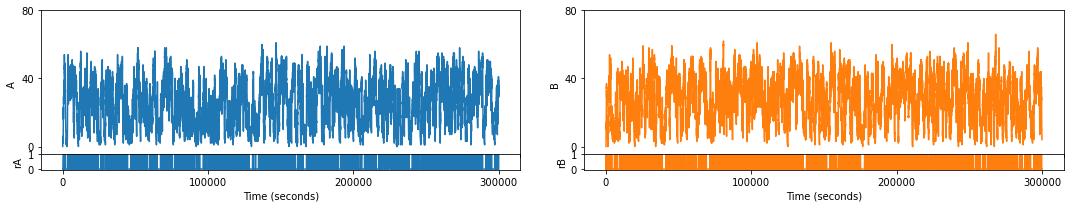

In [3]:
'''We examine the discrete state system response with respect to the repression strength k=a_0/a_1'''
k = 0.05
g = 0.2
d = 0.005
a_0 = 0.0005
a_1 = a_0/k
N=300000    #Total observation length (seconds)
labels=[['A','B'],['rA','rB']]
x,t=ssa(np.array([[0,0,0,0]]),g,d,a_0,a_1,N)
plot_trajectory(x,t)

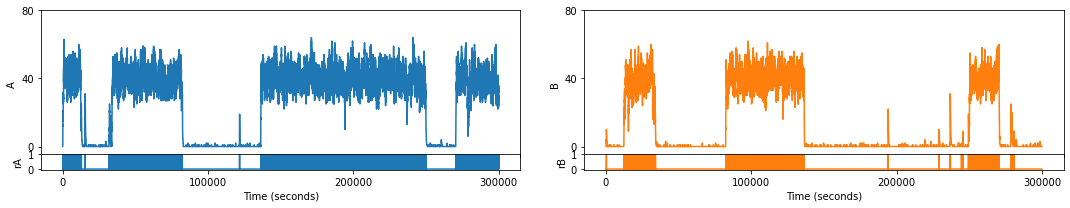

In [4]:
'''We examine discrete state system response with respect to the repression strength k=a_0/a_1'''
k = 5
g = 0.2
d = 0.005
a_0 = 0.05
a_1 = a_0/k
N=300000    #Total observation length (seconds)
labels=[['A','B'],['rA','rB']]
x,t=ssa(np.array([[0,0,0,0]]),g,d,a_0,a_1,N)
plot_trajectory(x,t)

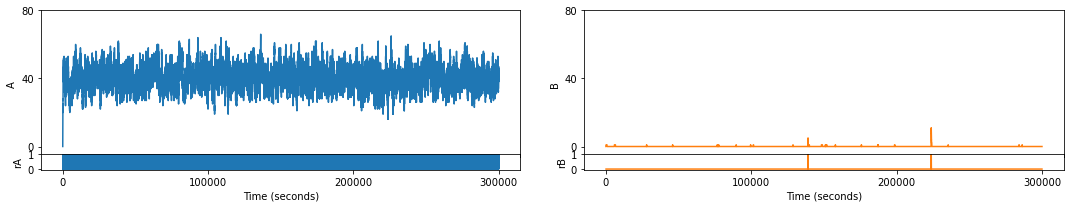

In [5]:
'''We examine discrete state system response with respect to the repression strength k=a_0/a_1'''
k = 50
g = 0.2
d = 0.005
a_0 = 0.5
a_1 = a_0/k
N=300000    #Total observation length (seconds)
labels=[['A','B'],['rA','rB']]
x,t=ssa(np.array([[0,0,0,0]]),g,d,a_0,a_1,N)
plot_trajectory(x,t)

We next look at the corresponding continuous sytem and get numerical solutions by RK45. We perform simulations with the the same set of parameters but change the initial conditions. We verify the claim in the paper that the continuous system is monostable.

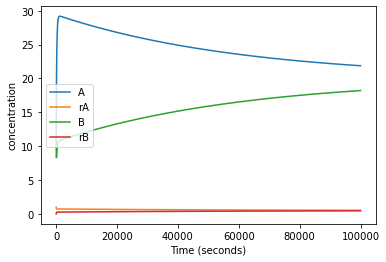

In [6]:
g=0.2
d=0.005
a_0=0.1
a_1=0.01
T=100000
sol = solve_ivp(switch,[0,T], [10,1,10,0],dense_output=True)
plt.plot(sol.t,sol.y.T)
plt.legend(['A','rA','B','rB'])
plt.xlabel('Time (seconds)')
plt.ylabel('concentration')
plt.show()

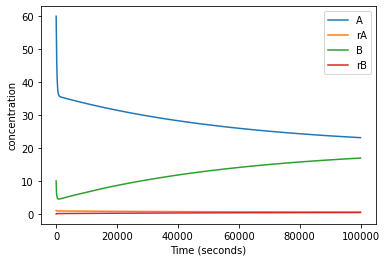

In [8]:
g=0.2
d=0.005
a_0=0.1
a_1=0.01
T=100000
sol = solve_ivp(switch,[0,T], [60,1,10,0],dense_output=True)
plt.plot(sol.t,sol.y.T)
plt.legend(['A','rA','B','rB'])
plt.xlabel('Time (seconds)')
plt.ylabel('concentration')
plt.show()

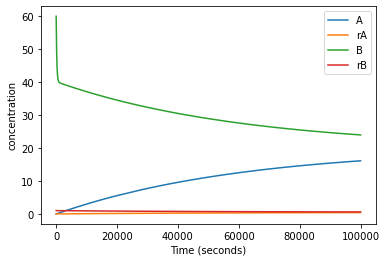

In [7]:
g=0.2
d=0.005
a_0=0.1
a_1=0.01
T=100000
sol = solve_ivp(switch,[0,T], [0,0,60,1],dense_output=True)
plt.plot(sol.t,sol.y.T)
plt.legend(['A','rA','B','rB'])
plt.xlabel('Time (seconds)')
plt.ylabel('concentration')
plt.show()

With the three different initial conditions tested, all solutions went to the same equilibrium states.